# Elliptic Curve Diffie Hellman

## A first implementation of a class representing elliptic curves.
In order to represent elliptic curves, we will use the following class :

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
class EllipticCurve :
    def __init__(self, a, b, x_range=(-1, 1), y_range=(-1, 1), resolution = 50000):
        """
        The elliptic curve is defined by the equation y^2 = x^3 + ax + b.
        """
        self.a = a
        self.b = b
        self.resolution = resolution
        self.x_range = x_range
        self.y_range = y_range
        def equation(x) :
            return x**3 + self.a * x + self.b
        self.eq = equation

    def add_points(self, *points):
        """
        Add points to the graph. (It's needed to call display() to show the result.
        """
        for point in points :
            plt.scatter(point[0], point[1], marker="+", color="green", s=100)

    def add_lines(self, *couples):
        x = np.linspace(self.x_range[0], self.x_range[1], self.resolution)
        for couple in couples :
            plt.plot(x, self.__lines_between__(couple[0], couple[1])(x), color="green")

    def add_tangents(self, *points):
        x = np.linspace(self.x_range[0], self.x_range[1], self.resolution)
        for point in points :
            plt.scatter(point[0], point[1],marker="+", color="red", s=100)
            plt.plot(x, self.__tangent_at__(point[0], point[1])(x), color="red")
        
    
    def display(self):
        """
        Display the curve on the plane.
        """
        x = np.linspace(self.x_range[0], self.x_range[1], self.resolution)     
        y_squared = self.eq(x)
        y_p = np.sqrt(y_squared[y_squared>= 0])
        x = x[y_squared>= 0]
        plt.title(f"Elliptic curve : $y^2 = x^3 {'+' if self.a > 0 else ''}{self.a}x {'+' if self.b > 0 else ''}{self.b}$")
        plt.plot(x, y_p, color="blue")
        plt.plot(x, -y_p, color="blue")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(self.x_range)
        plt.ylim(self.y_range)
        plt.show()

    def get_ordinates(self, x) :
        """
        Return the two ordinate of a given abscissa.
        """
        assert(self.eq(x) >= 0)
        return (np.sqrt(self.eq(x)), -np.sqrt(self.eq(x)))
    
    def __tangent_at__(self, x0, y0):
        """
        Return the equation of the tangent at a given point.
        """
        assert(y0**2 == self.eq(x0))
        slope = (3 * x0**2 + self.a) / (2 * y0)
        def tangent(x):
            return slope * (x - x0) + y0
        return tangent

    def __lines_between__(self, p1, p2) :
        """
        Return the equation of the line between two given points.
        """
        assert(p1[0] != p2[0])
        c = (p1[1] - p2[1])/(p1[0] - p2[0])
        def line(x) :
            return c*(x - p1[0]) + p1[1]
        return line

    def __displayZpZ__(self, p) :
        """
        Represent the curve on Z/pZ.
        """
        pass

    def sum(self,x0, y0, x1, y1):
        if x0 != x1 :
            c = (y1 - y0)/(x1 - x0)
            x2 = c**2 - x0 - x1
            y2 = c*(x0 - x2) - y0
            return (x2, y2)
        elif x1 == x0 and y1 != y0 :
            return (0,0)
        elif x1 == x0 and y1 == y0 and y0 != 0 :
            c = (3*x_1**2 + self.a)/(2*y0)
            x2 = m**2 - 2*x0
            y2 = m*(x0 - x2) - y0
            return (x2, y2)
        else :
            return (0, 0)
            
    def __repr__(self) :
        """
        The string returned by this function is the result of the command print(ec) where ec is an instance of the class.
        """
        return "Elliptic curve : y^2 = x^3 {}{}x {}{}".format('+' if self.a > 0 else '', self.a, '+' if self.b > 0 else '', self.b)

## How to use this class
### Display a curve on the plane

Elliptic curve : y^2 = x^3 -2x +2


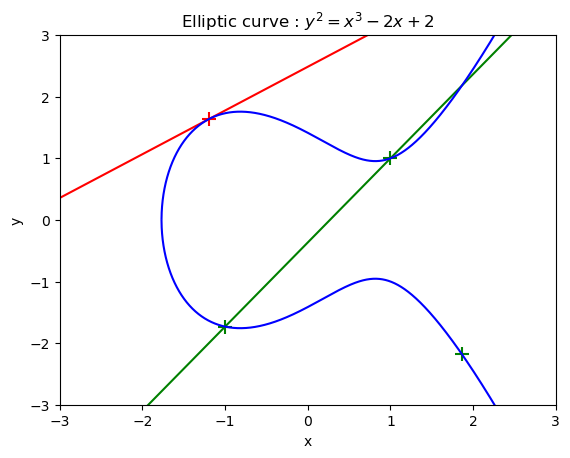

In [191]:
ec = EllipticCurve(-2, 2, (-3, 3), (-3,3))
print(ec)
y = ec.get_ordinates(-1)[1]
ec.add_tangents((-1.2, ec.get_ordinates(-1.2)[0])) 
ec.add_points((1,1), (-1, y), ec.sum(1,1,-1, y))
ec.add_lines(((1,1), (-1, y)))
ec.display()

### Display a curve in Z/pZ (when p is prime)

In [193]:
# ec.__displayZpZ__(self, 17)

# To do list :
- Display a curve an its tangent at the same time.
- Implement the addition of point on the curve
- Display the curve on Z/pZ groups
- Implement a tikz environment that handle the elliptic curves